In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# 이산형 확률분포

## 1차원 이산형 확률분포

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

### 1차원 이산확률분포의 정의

In [3]:
x_set = np.array([1, 2, 3, 4, 5, 6])

In [4]:
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

In [5]:
X = [x_set, f]

In [6]:
# 확률 p_k를 구한다
prob = np.array([f(x_k) for x_k in x_set])
# x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob))

{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

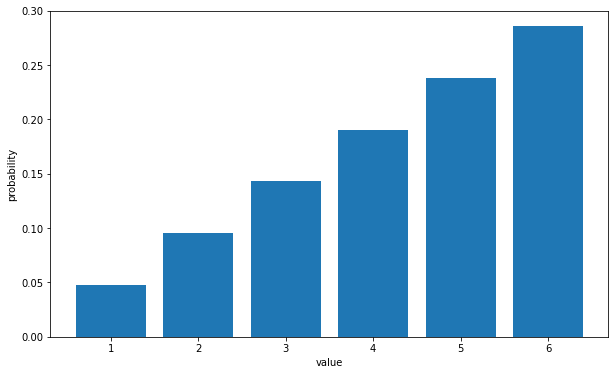

In [7]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

In [8]:
np.all(prob >= 0)

True

In [9]:
np.sum(prob)

1.000

주사위 눈이 x 이하가 될 확률

In [10]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [11]:
F(3)

0.286

1차원 이산형 확률 변수 <br>
y = 2x + 3

x_set = [1, 2, 3, 4, 5, 6]

In [12]:
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

### 1차원 이산형 확률변수의 지표

#### 기댓값
![스크린샷 2022-04-20 오후 2 46 59](https://user-images.githubusercontent.com/76269316/164159016-7e1294dd-8aa2-4cfd-8519-7623fb2085ba.png)


In [13]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333

기댓값 = 확률 변수의 평균 <br>
주사위를 100만번 굴린 실현값의 평균

In [14]:
sample = np.random.choice(x_set, int(1e6), p=prob)  # 1,000,000개 복원 추출
np.mean(sample)

4.329

g에 아무것도 지정하지 않을 경우 확률변수 X의 기댓값이 구해짐 <br>
![스크린샷 2022-04-20 오후 2 59 26](https://user-images.githubusercontent.com/76269316/164160622-5ed61f6c-e130-4596-a77c-85347299f572.png)


In [15]:
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [16]:
E(X)

4.333

In [17]:
E(X, g=lambda x: 2*x + 3)

11.667

E(2X+3) = 2E(X) + 3

In [18]:
2 * E(X) + 3

11.667

#### 분산
![스크린샷 2022-04-20 오후 3 04 52](https://user-images.githubusercontent.com/76269316/164161325-31018d81-c7f2-47bd-8c84-2a398fe147b5.png)

In [19]:
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.222



```
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])
```



In [20]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [21]:
V(X)

2.222

![스크린샷 2022-04-20 오후 3 09 09](https://user-images.githubusercontent.com/76269316/164161834-69af21d3-7a34-4e7f-98c0-52636c9cac89.png)


In [22]:
V(X, lambda x: 2*x + 3)

8.889

In [23]:
2**2 * V(X)

8.889

## 2차원 이산형 확률분포

### 2차원 이산형 확률분포의 정의

확률변수 (X, Y)의 움직임을 동시에 고려한 분포 <br>
ex) 불공정한 주사위 A와 B가 있을 때, A와 B의 눈을 더한 것을 X, A의 눈을 Y로 하는 2차원 확률 분포

In [24]:
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [25]:
def f_XY(x, y):
    if 1 <= y <=6 and 1 <= x - y <= 6:
        return y * (x-y) / 441  # X-A의 눈이 나올 확률 * A의 눈이 나올 확률
    else:
        return 0

In [26]:
XY = [x_set, y_set, f_XY]

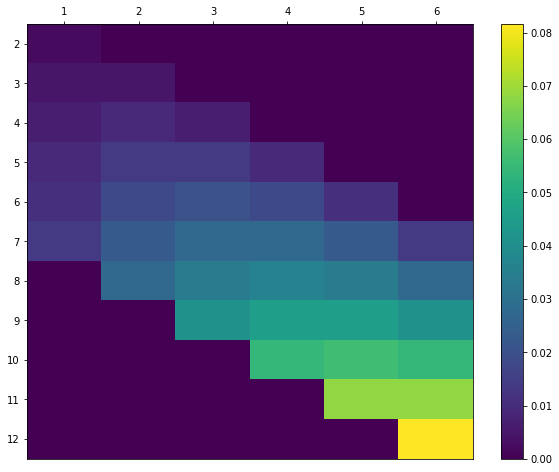

In [27]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set] for x_i in x_set])  # 안쪽 for loop (for y_j in y_set) 먼저 실행

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)  # minor ticks를 그리지 않음
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)
# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다
ax.invert_yaxis()
# x축의 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [28]:
np.all(prob >= 0)

True

In [29]:
np.sum(prob)

1.000

![스크린샷 2022-04-20 오후 3 30 20](https://user-images.githubusercontent.com/76269316/164164700-edd865ba-11c0-4e6a-a8cf-86860933f5fe.png)


주변확률분포 <br>
개별 확률변수값을 알고 싶을 때

In [30]:
def f_X(x):  # 행을 더한 값
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [31]:
def f_Y(y):  # 열을 더한 값
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [32]:
X = [x_set, f_X]
Y = [y_set, f_Y]



```
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)
```



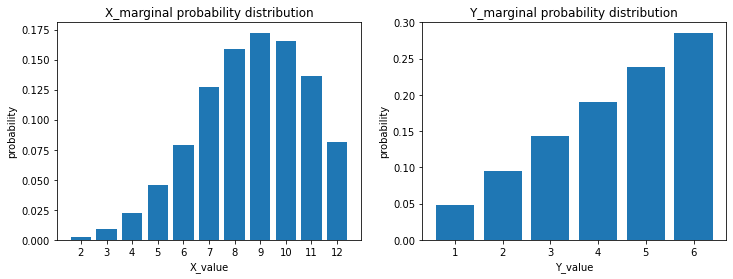

In [33]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

### 2차원 이산형 확률분포의 지표

기댓값 <br>
![스크린샷 2022-04-20 오후 3 33 45](https://user-images.githubusercontent.com/76269316/164165267-84741aac-df0e-4c4b-a3bf-a6225a483977.png)

In [34]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.667



```
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

def f_XY(x, y):
    if 1 <= y <=6 and 1 <= x - y <= 6:
        return y * (x-y) / 441  # X-A의 눈이 나올 확률 * A의 눈이 나올 확률
    else:
        return 0
        
XY = [x_set, y_set, f_XY]
```



In [35]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [36]:
mean_X = E(XY, lambda x, y: x)  # x_set, y_set 중 x_set만 사용, sum(x_i * f_XY(x_i, y_j)) -> x_set의 기댓값
mean_X

8.667

In [37]:
mean_Y = E(XY, lambda x, y: y)  # x_set, y_set 중 y_set만 사용, sum(y_j * f_XY(x_i, y_j)) -> y_set의 기댓값
mean_Y

4.333

![스크린샷 2022-04-20 오후 3 43 17](https://user-images.githubusercontent.com/76269316/164166717-2842764d-6928-47ea-968d-1d258084c6c3.png)


In [38]:
a, b = 2, 3

In [39]:
E(XY, lambda x, y: a*x + b*y)

30.333

In [40]:
a * mean_X + b * mean_Y

30.333

분산 <br>
![스크린샷 2022-04-20 오후 3 53 29](https://user-images.githubusercontent.com/76269316/164168351-bccd49f2-39d1-412f-8dee-0807434da3b5.png)


In [41]:
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j)
       for x_i in x_set for y_j in y_set])

4.444



```
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])
```



In [42]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [43]:
var_X = V(XY, g=lambda x, y: x)
var_X

4.444

In [44]:
var_Y = V(XY, g=lambda x, y: y)
var_Y

2.222

공분산 <br>
![스크린샷 2022-04-20 오후 3 54 47](https://user-images.githubusercontent.com/76269316/164168528-f0c09b66-013b-4888-ac5e-111e045078d3.png)



```
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])
```



In [45]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

In [46]:
cov_xy = Cov(XY)
cov_xy

2.222

![스크린샷 2022-04-20 오후 3 57 00](https://user-images.githubusercontent.com/76269316/164168898-d6a89261-bcfe-42f6-9c78-4cc31002e45e.png)


In [47]:
V(XY, lambda x, y: a*x + b*y)

64.444

In [48]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.444

상관계수 <br>
![스크린샷 2022-04-20 오후 3 58 07](https://user-images.githubusercontent.com/76269316/164169091-ef8aee62-2a38-4ef1-a506-1af1940379d8.png)

In [49]:
cov_xy / np.sqrt(var_X * var_Y)

0.707